In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.cluster import AffinityPropagation,KMeans,AgglomerativeClustering,Birch,MeanShift,SpectralClustering,DBSCAN,OPTICS
from scipy.optimize import linear_sum_assignment


In [ ]:
col_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df_iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=col_names).astype('category')
species = df_iris['Species'].cat.codes.tolist()
x = 'PetalWidthCm'
y = 'PetalLengthCm'
X = df_iris.drop(columns=['Species'])


In [ ]:
def cluster_acc(y_true, y_pred):
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    r_ind,c_ind = linear_sum_assignment(w.max() - w)
    acc = 0
    for i in range(0,len(r_ind)):
        acc += w[r_ind[i], c_ind[i]]
    acc = 100.0 * acc / y_pred.size
    print("Training Accuracy = " + str(acc))

def plot_graph(clust_labels, clustering_type):
    f, ax = plt.subplots(figsize = (15,10))
    plt.rc('font', size=18)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.set_title(clustering_type,color='white')
    ax.tick_params(colors='white')
    sctter = plt.scatter(x=df_iris[x], y=df_iris[y], c=clust_labels)
    plt.colorbar(sctter)


Training Accuracy = 89.33333333333333


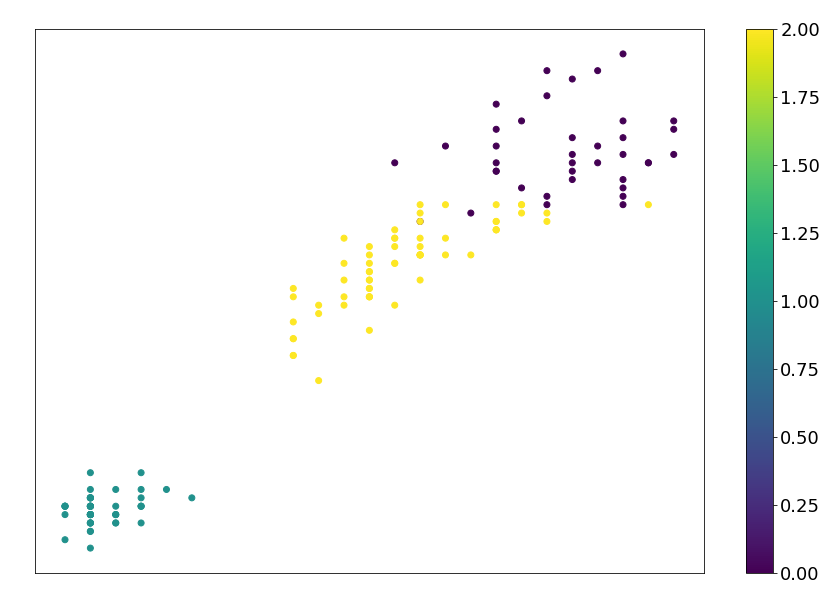

In [ ]:
kmeans = KMeans(n_clusters=3)
clust_labels = kmeans.fit_predict(X)

plot_graph(clust_labels,'K Means Clustering')
cluster_acc(np.array(species), np.array(clust_labels))


In [ ]:
model = AgglomerativeClustering(n_clusters=3)
clust_labels = model.fit_predict(X)

plot_graph(clust_labels, 'Agglomerative Clustering')
cluster_acc(np.array(species), np.array(clust_labels))


# New Section

Training Accuracy = 90.0


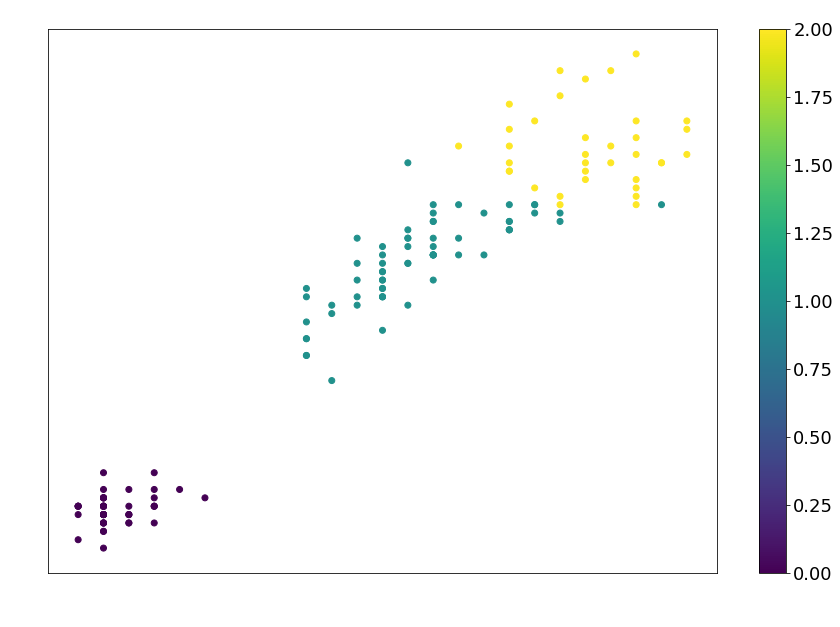

In [ ]:
model = SpectralClustering(n_clusters=3)
clust_labels = model.fit_predict(X)

plot_graph(clust_labels, 'Spectral Clustering')
cluster_acc(np.array(species), np.array(clust_labels))


Training Accuracy = 81.33333333333333


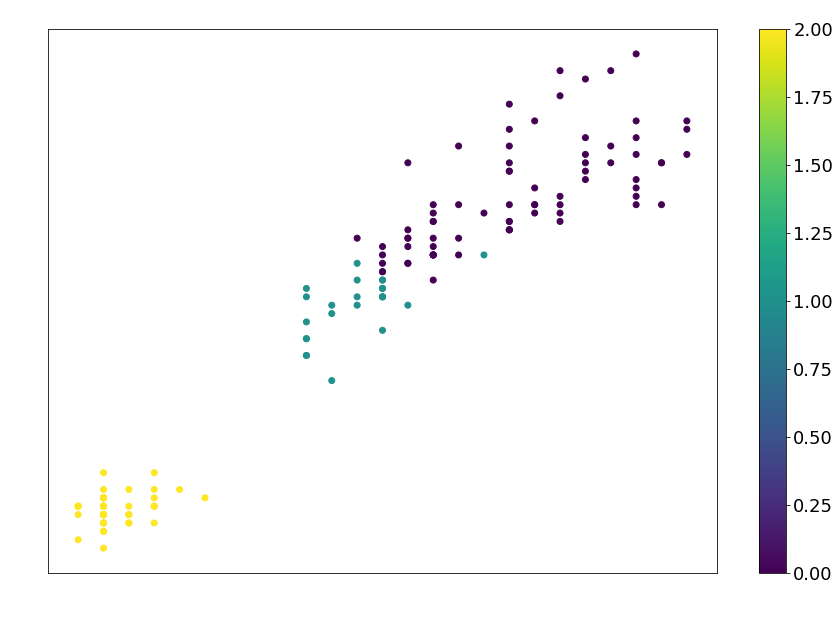

In [ ]:
model = Birch(n_clusters=3)
clust_labels = model.fit_predict(X)

plot_graph(clust_labels, 'BIRCH Clustering')
cluster_acc(np.array(species), np.array(clust_labels))


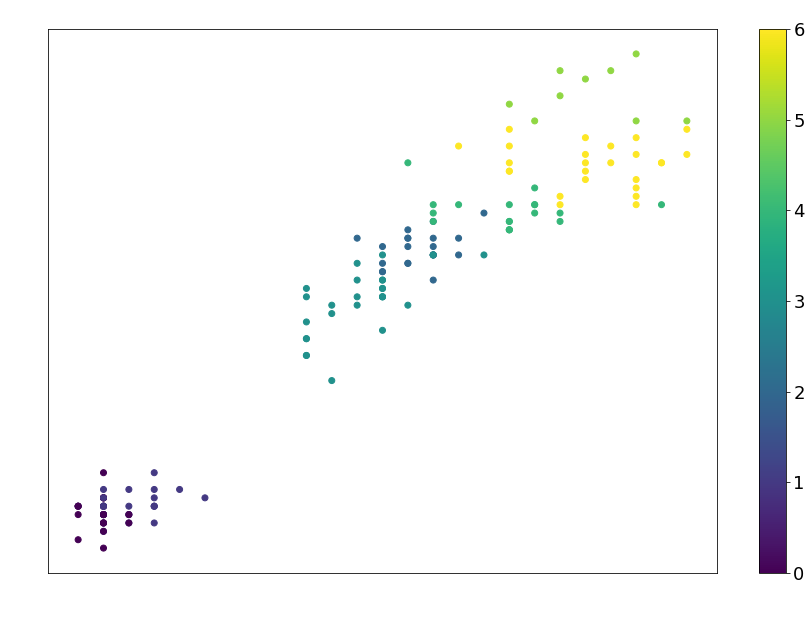

In [ ]:
model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
clust_labels = model.fit_predict(X)

plot_graph(clust_labels, 'Affinity Propogation Clustering')


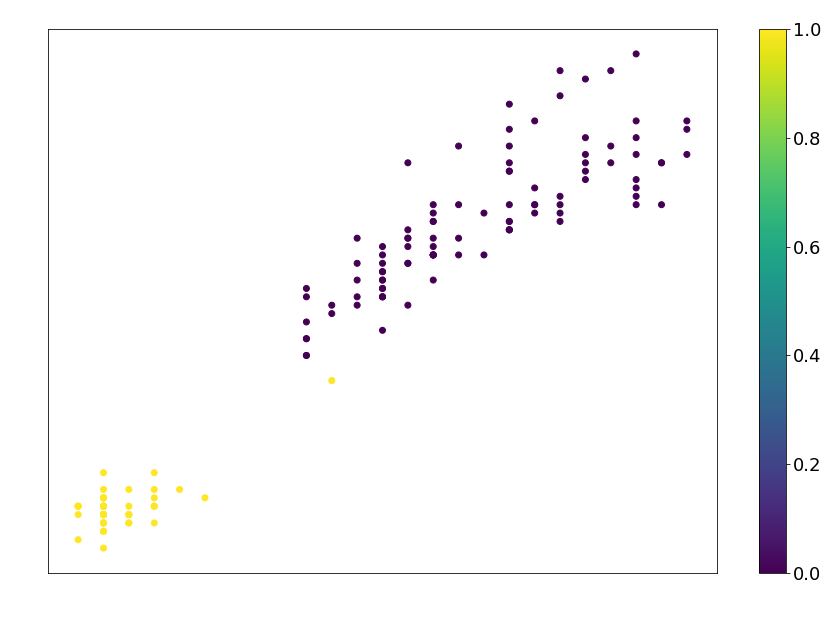

In [ ]:
model = MeanShift()
clust_labels = model.fit_predict(X)

plot_graph(clust_labels, 'Mean Shift Clustering')


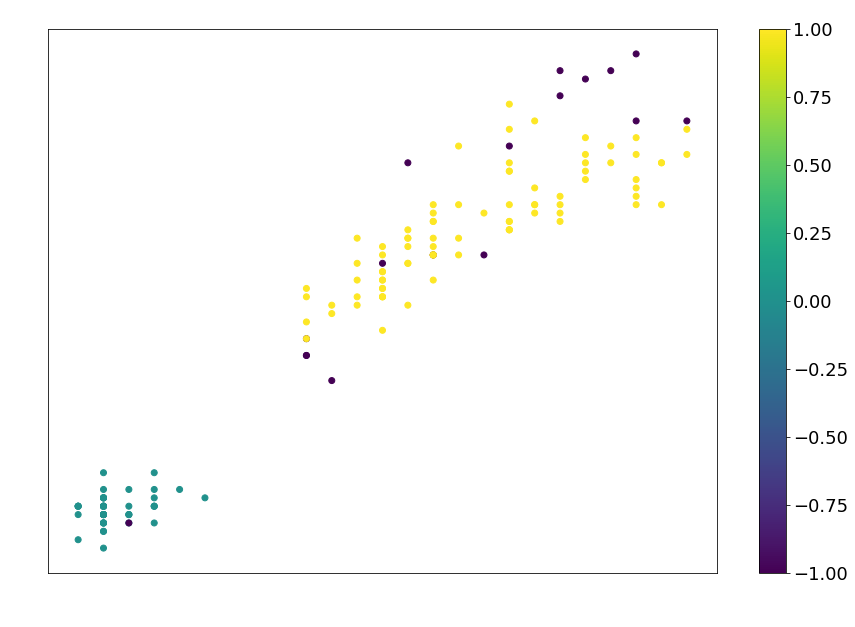

In [ ]:
model = DBSCAN()
clust_labels = model.fit_predict(X)

plot_graph(clust_labels, 'DBSCAN Clustering')


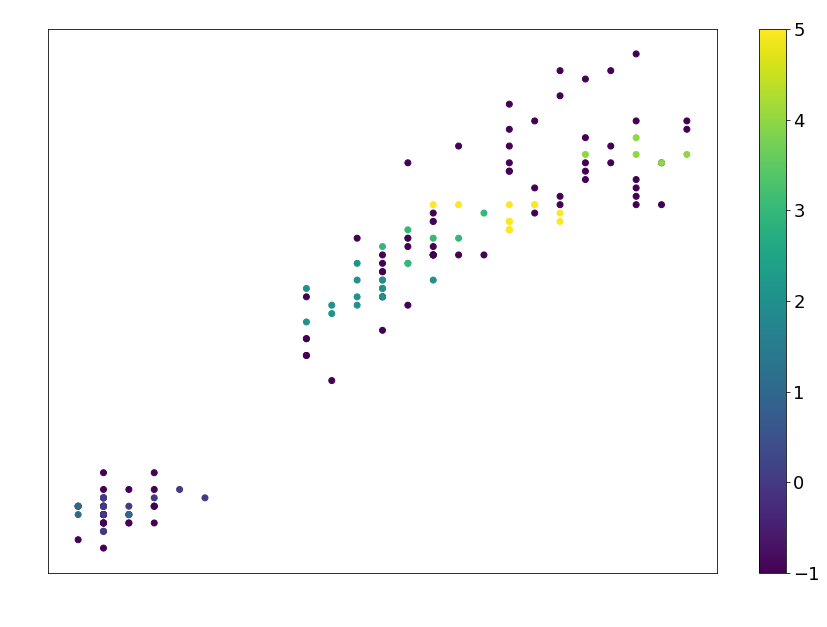

In [ ]:
model = OPTICS()
clust_labels = model.fit_predict(X)

plot_graph(clust_labels, 'OPTICS Clustering')
